Step 1:Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_theme()  # better looking plots

Step 2: Load datasets

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3: Data cleaning

In [ ]:
# Drop Cabin (only if exists)
train = train.drop(columns=["Cabin"], errors="ignore")
test = test.drop(columns=["Cabin"], errors="ignore")

# Fill missing Age with median
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

# Fill missing Embarked in train with mode
if "Embarked" in train.columns:
    train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

# Fill missing Fare in test with median
if "Fare" in test.columns:
    test["Fare"] = test["Fare"].fillna(test["Fare"].median())


Step 4:Feature encoding

In [ ]:
# Check available columns
print(train.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [ ]:
X = train.drop(columns=["PassengerId", "Name", "Ticket", "Survived"])
y = train["Survived"]

# Align test with train (to avoid column mismatch)
X_test = test.drop(columns=["PassengerId", "Name", "Ticket"])
X_test = X_test.reindex(columns=X.columns, fill_value=0)

X.shape, X_test.shape

((891, 7), (418, 7))

Step 5: Train/Validation split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Validation size:", X_val.shape)

Train size: (712, 7) Validation size: (179, 7)


Step 6:Confusion Matrix

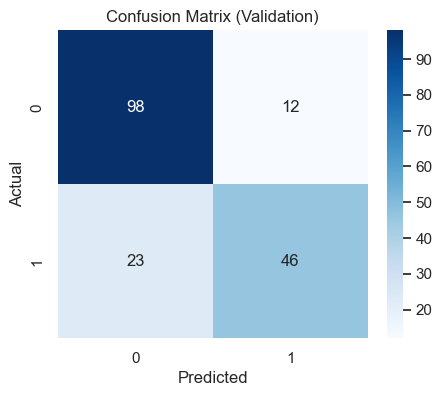

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation)")
plt.show()

Step 7:Predict on test set & save submission

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 2. Encode 'Sex'
train["Sex"] = train["Sex"].map({"male": 1, "female": 0})
test["Sex"] = test["Sex"].map({"male": 1, "female": 0})

# 3. Handle missing values
train["Age"].fillna(train["Age"].median(), inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)
test["Fare"].fillna(test["Fare"].median(), inplace=True)

# 4. Features & target
X = train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
y = train["Survived"]

# 5. Split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 7. Validation check
val_preds = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))

# 8. Predict on real test.csv
X_real_test = test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
test_preds = model.predict(X_real_test)

# 9. Create submission
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_preds.astype(int)
})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")
submission.head()



Validation Accuracy: 0.8100558659217877
Submission file saved as submission.csv


C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_12524\2338018076.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].median(), inplace=True)
C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_12524\2338018076.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
